In [1]:
# Use ANN to predict number of rings on a an abalone snail
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.model_selection import cross_val_score

In [2]:
# import abalone data
abalone_data = pd.read_csv("../abalone.csv")

abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole-wt    4177 non-null   float64
 5   shucked-wt  4177 non-null   float64
 6   viscera-wt  4177 non-null   float64
 7   shell-wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
# a. Convert the column rings into your Y array as follows:
# >= 8: Class 0
# 9 or 10: Class 1
# else: Class 2

# define class conversion function
def class_conversion(x):
    if x <= 8:
        return 0
    elif x==9 or x==10:
        return 1
    else:
        return 2
    
# create y data
target_data = np.array([class_conversion(x) for x in abalone_data['rings']])

In [4]:
# b. the column gender has three categorical values, M, F, and I.
# Convert this to 1-hot using get_dummies

# select all columns but rings
abalone_prime = abalone_data.loc[:, 'gender':'shell-wt']

# use get dummies on gender
x_DF = pd.get_dummies(abalone_prime, columns=['gender'])

# convert x dataframe to numpy array
x_data = np.array(x_DF)

In [5]:
# c. Some of the columns are nearly collinear so methods like
# QDA will produce errors. Convert the data to the highest principle
# components

pca = PCA(n_components=5)
pca.fit(x_data)
input_data = pca.transform(x_data)

In [6]:
# d. Calculate teh errors using 10-fold cross validation on KNN and
# QDA. Save scores as KNNScores and QDAScores

# KNN
KNN = KNeighborsClassifier(n_neighbors=4)
KNNScores = cross_val_score(KNN, input_data, target_data, cv=10, scoring='accuracy')
print("KNN", np.mean(KNNScores), np.std(KNNScores))

# QDA
QDA = QuadraticDiscriminantAnalysis()
QDAScores = cross_val_score(QDA, input_data, target_data, cv=10, scoring='accuracy')
print("QDA", np.mean(QDAScores), np.std(QDAScores))

KNN 0.6107248172753662 0.014998157967383217
QDA 0.619336110059321 0.039309166870116014


In [7]:
# e. Repeat with a neural network. Can you do better than either KNN
# or QDA? Try to vary number and layers and sizes of the hidden layers

ann = ANN(alpha=1e-5, max_iter=5000, hidden_layer_sizes=(2,3,3), random_state=1)
ANNScores = cross_val_score(ann, input_data, target_data, cv=10, scoring='accuracy')
print("ANN", np.mean(ANNScores), np.std(ANNScores))

ANN 0.6442325565385012 0.033129674350675126


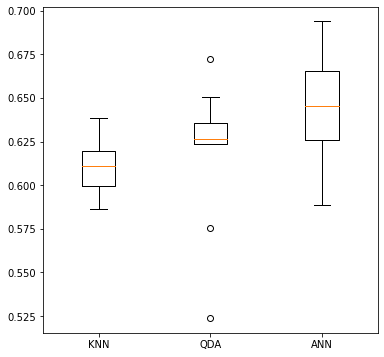

In [8]:
# f. make a boxplot of the resulting scores

plt.boxplot([KNNScores, QDAScores, ANNScores])
plt.xticks([1,2,3], ["KNN","QDA","ANN"])
plt.gcf().set_size_inches(6,6)
plt.show()